In [11]:
# 기본
import os

# 분석 라이브러리
import pandas as pd
import numpy as np

#시각호 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [12]:
# 파일 목록
os.listdir()

['.ipynb_checkpoints',
 'adult_data.csv',
 'adult_names.txt',
 'adult_test.csv',
 '[Adult] 1. Basic EDA.ipynb']

In [13]:
# 데이터 읽어오기

train = pd.read_csv('adult_data.csv')
test = pd.read_csv('adult_test.csv')

In [14]:
train.head(2)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [15]:
test.head(2)

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


✨ **`필요한 작업`**: train, test 열 지정해주기!!

In [6]:
pd.read_table('adult_names.txt').tail(15)

,| This data was extracted from the census bureau database found at
91,">50K, <=50K."
92,age: continuous.
93,"workclass: Private, Self-emp-not-inc, Self-emp..."
94,fnlwgt: continuous.
95,"education: Bachelors, Some-college, 11th, HS-g..."
96,education-num: continuous.
97,"marital-status: Married-civ-spouse, Divorced, ..."
98,"occupation: Tech-support, Craft-repair, Other-..."
99,"relationship: Wife, Own-child, Husband, Not-in..."
100,"race: White, Asian-Pac-Islander, Amer-Indian-E..."


✨ **`필요한 작업`**: 확인 됨 열이름으로 train과 test에 넣어주기


'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation' ,'relationship', 'race' ,'sex' ,'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'

age : 나이   
workclass : 고용 형태  
fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)  
education : 교육 수준  
education_num : 교육 수준 수치  
marital_status: 결혼 상태  
occupation : 업종  
relationship : 가족 관계  
race : 인종  
sex : 성별  
capital_gain : 양도 소득  
capital_loss : 양도 손실  
hours_per_week : 주당 근무 시간  
native_country : 국적  
income : 수익 (예측해야 하는 값)  

# 데이터 살펴보기 전 기본사항 처리

In [7]:
train.shape

(32560, 15)

In [16]:
test.shape

(16280, 15)

In [17]:
train.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                 'education-num', 'marital-status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital-gain', 
                 'capital-loss', 'hours-per-week', 'native-country','income']

In [48]:
train.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24745,51,Private,53833,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,46,United-States,>50K
19064,31,Private,114937,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,<=50K
5516,35,Private,165767,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
20226,40,?,65545,Masters,14,Divorced,?,Own-child,White,Female,0,0,55,United-States,<=50K
27034,35,Private,328301,Assoc-acdm,12,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K


In [36]:
test.columns =  ['age', 'workclass', 'fnlwgt', 'education', 
                 'education-num', 'marital-status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital-gain', 
                 'capital-loss', 'hours-per-week', 'native-country','income']

In [34]:
test.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9602,33,Private,496743,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,88,United-States,<=50K.
9646,47,Private,234994,7th-8th,4,Separated,Craft-repair,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K.
338,48,Private,253596,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,48,United-States,<=50K.
5049,69,Private,192660,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K.
7932,64,Private,239450,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K.


#  데이터 살펴보기
  
  
  * train 파일 기준으로!

## 기본적인 사항

In [25]:
train.shape

(32560, 15)

In [27]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

==> 결측값이 없다고 나옴. 그러나 간혹 결측값을 '-'나 '?'로 처리하는 경우가 있어서 문자형인 경우 살펴볼 필요있음!

## 기술통계

In [50]:
# 수치형
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


==> 수치형의 경우 capital-gain과 capital-loss가 75%까지 0인 것을 보아 한번 전체적으로 살펴봐야함!

In [52]:
# 문자형
train.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [60]:
for col in train.columns:
    if train[col].dtype == 'object':
        categories = train[col].unique()
        print(f'[{col}]-- ({len(categories)}개)')
        print('\n'.join(categories))
        print()

[workclass]-- (9개)
 Self-emp-not-inc
 Private
 State-gov
 Federal-gov
 Local-gov
 ?
 Self-emp-inc
 Without-pay
 Never-worked

[education]-- (16개)
 Bachelors
 HS-grad
 11th
 Masters
 9th
 Some-college
 Assoc-acdm
 Assoc-voc
 7th-8th
 Doctorate
 Prof-school
 5th-6th
 10th
 1st-4th
 Preschool
 12th

[marital-status]-- (7개)
 Married-civ-spouse
 Divorced
 Married-spouse-absent
 Never-married
 Separated
 Married-AF-spouse
 Widowed

[occupation]-- (15개)
 Exec-managerial
 Handlers-cleaners
 Prof-specialty
 Other-service
 Adm-clerical
 Sales
 Craft-repair
 Transport-moving
 Farming-fishing
 Machine-op-inspct
 Tech-support
 ?
 Protective-serv
 Armed-Forces
 Priv-house-serv

[relationship]-- (6개)
 Husband
 Not-in-family
 Wife
 Own-child
 Unmarried
 Other-relative

[race]-- (5개)
 White
 Black
 Asian-Pac-Islander
 Amer-Indian-Eskimo
 Other

[sex]-- (2개)
 Male
 Female

[native-country]-- (42개)
 United-States
 Cuba
 Jamaica
 India
 ?
 Mexico
 South
 Puerto-Rico
 Honduras
 England
 Canada
 Germany
 Ir

**위 방식으로도 unique값을 볼 수 있지만, 각 열 값들의 unique 개수가 많으니  --> 시각화그래프를 통해 보다 잘 파악할 수 있음**

In [61]:
# 문자형인 열과 unique값 확인

for col in train:
    if train[col].dtype == "object":
        cat= train[col].unique()
        print(f'[{col}]--({len(cat)}개)')

[workclass]--(9개)
[education]--(16개)
[marital-status]--(7개)
[occupation]--(15개)
[relationship]--(6개)
[race]--(5개)
[sex]--(2개)
[native-country]--(42개)
[income]--(2개)


In [62]:
train.sex.value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

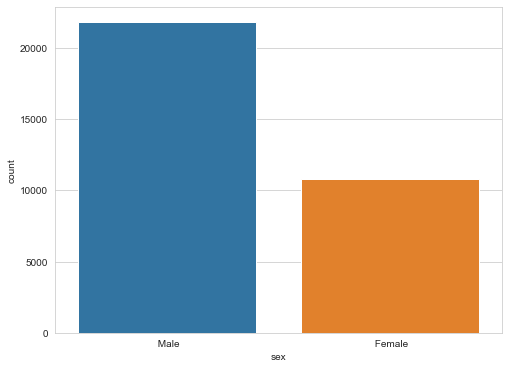

In [67]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.countplot(data=train, x="sex")
plt.show()

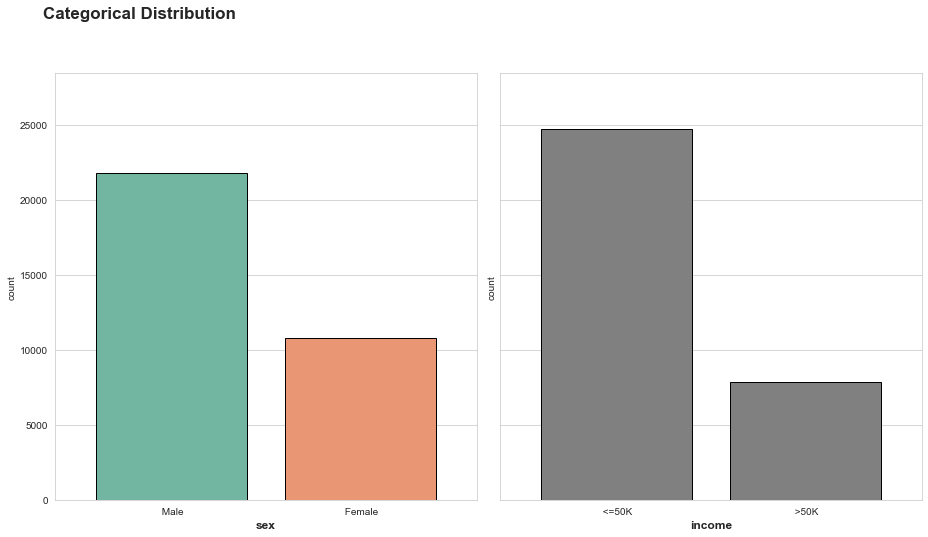

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7), sharey=True)

sns.countplot(x='sex', data=train, ax=axes[0], palette="Set2", edgecolor='black') 
sns.countplot(x='income', data=train, ax=axes[1], color='gray', edgecolor='black') 

# Margin & Label 조정
for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

    
# figure title    
plt.suptitle('Categorical Distribution', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'native_country'

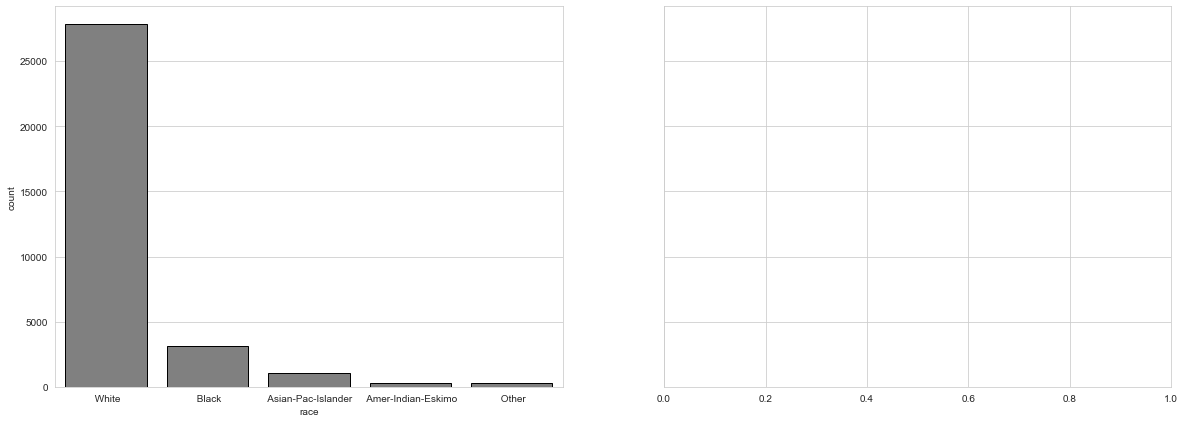

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.countplot(x='race', data=train, ax=axes[0], color="gray", edgecolor='black') 
sns.countplot(x='native_country', data=train, ax=axes[1], color='gray', edgecolor='black') 

# Margin & Label 조정
for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90 )    
    
# figure title    
plt.suptitle('Categorical Distribution 2', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'marital_status'

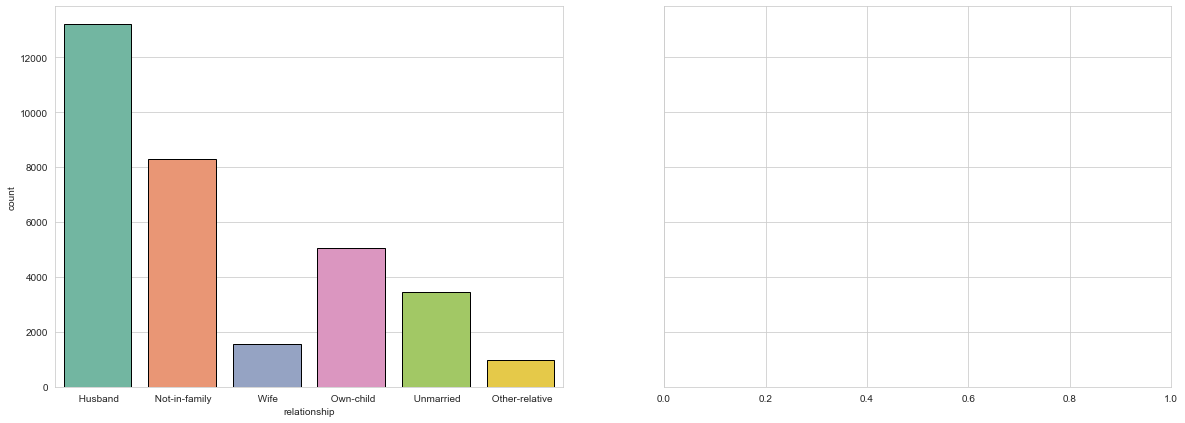

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.countplot(x='relationship', data=train, ax=axes[0], palette="Set2", edgecolor='black') 
sns.countplot(x='marital_status', data=train, ax=axes[1], palette='Set2', edgecolor='black') 

# Margin & Label 조정
for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=50 )    
    
# figure title    
plt.suptitle('Categorical Distribution 2', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

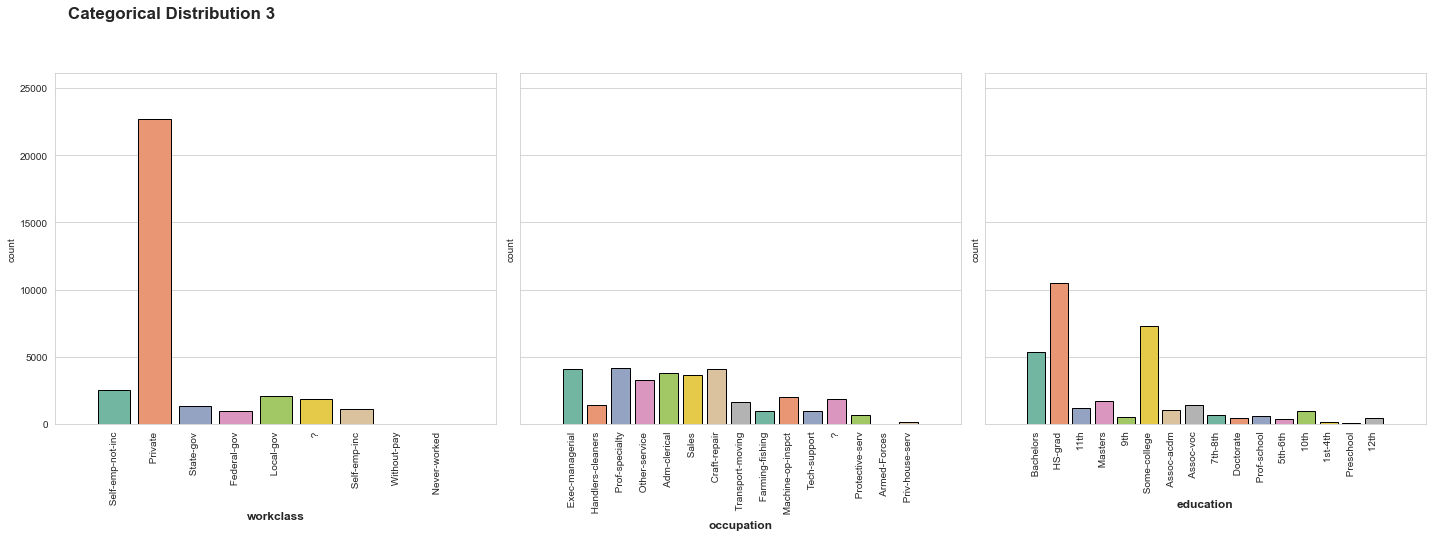

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

sns.countplot(x='workclass', data=train, ax=axes[0], palette="Set2", edgecolor='black') 
sns.countplot(x='occupation', data=train, ax=axes[1], palette='Set2', edgecolor='black') 
sns.countplot(x='education', data=train, ax=axes[2], palette='Set2', edgecolor='black') 

# Margin & Label 조정
for idx, ax in enumerate(axes) : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=90 )    
    
# figure title    
plt.suptitle('Categorical Distribution 3', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

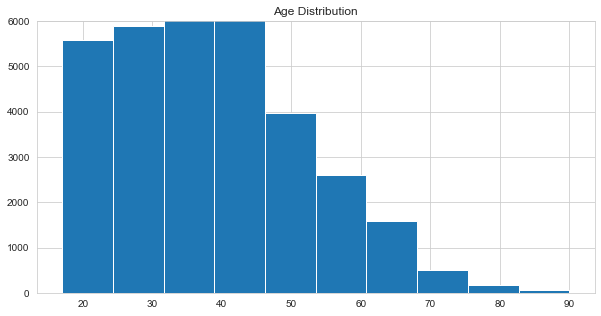

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(train['age'], bins=10)
ax.set_ylim(0, 6000)
ax.set_title('Age Distribution')
plt.show()

In [29]:
# 시각화 전 기본 세팅
#한글 깨짐
plt.rc("font", family="Malgun Gothic")

#그래프
sns.set_style("whitegrid")